# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of the Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.cm as cm
import matplotlib.colors as mcol

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | kuta
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | borogontsy
Processing Record 8 of Set 1 | crane
Processing Record 9 of Set 1 | donghai
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | sinabang
Processing Record 12 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | chita
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | kailua-kona
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 

Processing Record 39 of Set 4 | dolores
Processing Record 40 of Set 4 | kremenets
Processing Record 41 of Set 4 | st. john's
Processing Record 42 of Set 4 | cotonou
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | mukalla
Processing Record 45 of Set 4 | santa cruz
Processing Record 46 of Set 4 | mount pearl
Processing Record 47 of Set 4 | chernyshevskiy
Processing Record 48 of Set 4 | baraboo
Processing Record 49 of Set 4 | caleta de carquin
Processing Record 0 of Set 5 | olinda
Processing Record 1 of Set 5 | rezekne
Processing Record 2 of Set 5 | kerikeri
Processing Record 3 of Set 5 | motueka
Processing Record 4 of Set 5 | inhambane
Processing Record 5 of Set 5 | touros
Processing Record 6 of Set 5 | palmares do sul
Processing Record 7 of Set 5 | pangai
Processing Record 8 of Set 5 | golfito
Processing Record 9 of Set 5 | vadso
Processing Record 10 of Set 5 | constitucion
Processing Record 11 of Set 5 | rio grande
Processing Record 12 of Set 5 | tranovaho
City

Processing Record 31 of Set 8 | turkmenbasy
Processing Record 32 of Set 8 | cole harbour
Processing Record 33 of Set 8 | howrah
Processing Record 34 of Set 8 | newman
Processing Record 35 of Set 8 | namtsy
Processing Record 36 of Set 8 | sona
Processing Record 37 of Set 8 | daru
Processing Record 38 of Set 8 | velikiy ustyug
Processing Record 39 of Set 8 | cameta
Processing Record 40 of Set 8 | siewierz
Processing Record 41 of Set 8 | veraval
Processing Record 42 of Set 8 | sukhinichi
Processing Record 43 of Set 8 | itaituba
Processing Record 44 of Set 8 | harper
Processing Record 45 of Set 8 | ishigaki
Processing Record 46 of Set 8 | coahuayana de hidalgo
Processing Record 47 of Set 8 | floresti
Processing Record 48 of Set 8 | yatou
Processing Record 49 of Set 8 | leer
Processing Record 0 of Set 9 | yanchep
Processing Record 1 of Set 9 | chegdomyn
Processing Record 2 of Set 9 | tommot
Processing Record 3 of Set 9 | kalmunai
Processing Record 4 of Set 9 | kulhudhuffushi
Processing Reco

Processing Record 21 of Set 12 | port hedland
Processing Record 22 of Set 12 | eirunepe
Processing Record 23 of Set 12 | hami
Processing Record 24 of Set 12 | fayetteville
Processing Record 25 of Set 12 | revelstoke
Processing Record 26 of Set 12 | jiuquan
Processing Record 27 of Set 12 | mount isa
Processing Record 28 of Set 12 | christchurch
Processing Record 29 of Set 12 | yaren
Processing Record 30 of Set 12 | qui nhon
Processing Record 31 of Set 12 | undurkhaan
Processing Record 32 of Set 12 | dar naim
City not found. Skipping...
Processing Record 33 of Set 12 | kralendijk
Processing Record 34 of Set 12 | isola di capo rizzuto
Processing Record 35 of Set 12 | maceio
Processing Record 36 of Set 12 | addiet canna
Processing Record 37 of Set 12 | novyy urengoy
Processing Record 38 of Set 12 | sabang
Processing Record 39 of Set 12 | manismata
Processing Record 40 of Set 12 | serowe
Processing Record 41 of Set 12 | valentin gomez farias
Processing Record 42 of Set 12 | saint-pierre
Pro

[{'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 42.91,
  'Humidity': 75,
  'Cloudiness': 75,
  'Wind Speed': 9.22,
  'Country': 'CL',
  'Date': 1683584991},
 {'City': 'longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': 28.24,
  'Humidity': 86,
  'Cloudiness': 75,
  'Wind Speed': 2.3,
  'Country': 'SJ',
  'Date': 1683584991},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 42.82,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 43.55,
  'Country': 'TF',
  'Date': 1683584991},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 70.97,
  'Humidity': 55,
  'Cloudiness': 100,
  'Wind Speed': 14.23,
  'Country': 'PN',
  'Date': 1683584819},
 {'City': 'kuta',
  'Lat': -8.7233,
  'Lng': 115.1723,
  'Max Temp': 82.35,
  'Humidity': 83,
  'Cloudiness': 75,
  'Wind Speed': 17.27,
  'Country': 'ID',
  'Date': 1683584992},
 {'City': 'cidreira',
  'Lat': -30.1811,
  'Lng': -50.2056,
  'Max Temp': 6

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,42.91,75,75,9.22,CL,1683584991
1,longyearbyen,78.2186,15.6401,28.24,86,75,2.30,SJ,1683584991
2,port-aux-francais,-49.3500,70.2167,42.82,95,100,43.55,TF,1683584991
3,adamstown,-25.0660,-130.1015,70.97,55,100,14.23,PN,1683584819
4,kuta,-8.7233,115.1723,82.35,83,75,17.27,ID,1683584992


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

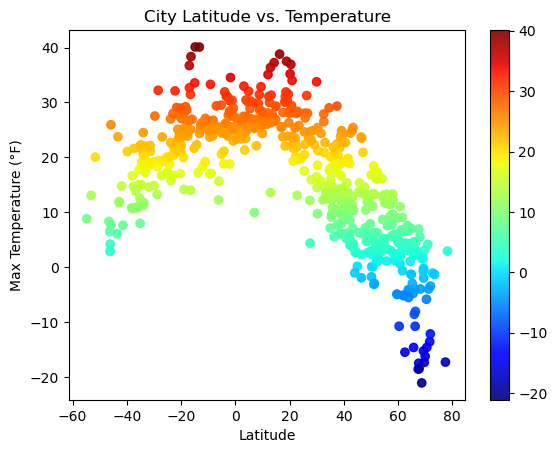

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],alpha=.9, c=city_data_df["Max Temp"],cmap='jet')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.colorbar()
# Save the figure
plt.savefig("../output_data/Fig1_Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

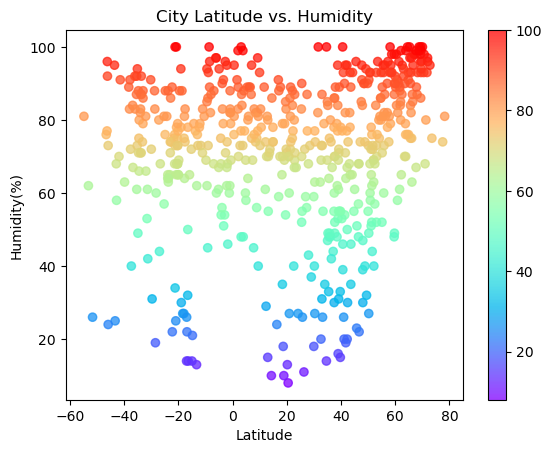

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha=.75, c=city_data_df["Humidity"],cmap='rainbow')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.colorbar()
# Save the figure
plt.savefig("../output_data/Fig2_Lat_Humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

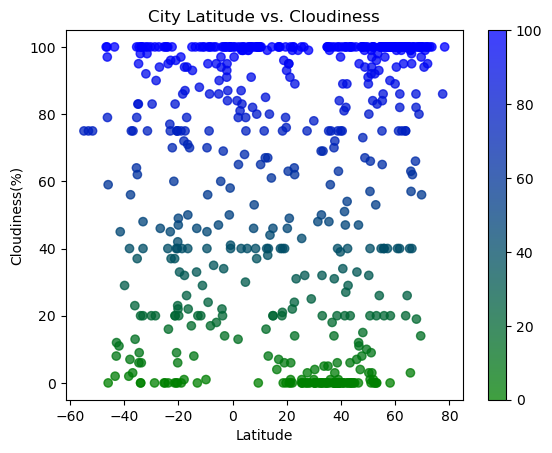

In [16]:
# Build the scatter plots for latitude vs. cloudiness
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["g","b"])
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],alpha=.75, c=city_data_df["Cloudiness"],cmap=cm1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.colorbar()

# Save the figure
plt.savefig("../output_data/Fig3_Lat_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

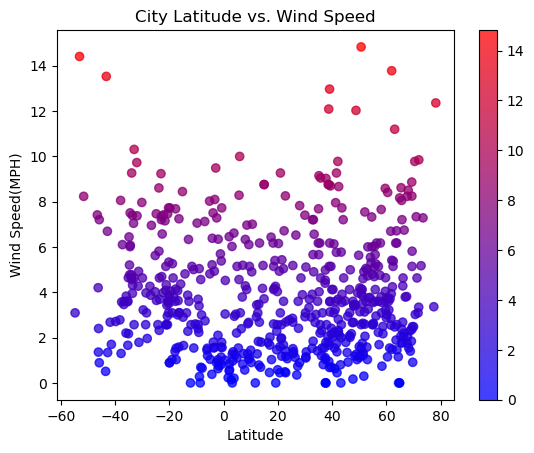

In [17]:
# Build the scatter plots for latitude vs. wind speed
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],alpha=.75, c=city_data_df["Wind Speed"],cmap=cm1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.colorbar()

# Save the figure
plt.savefig("../output_data/Fig4_Lat_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# slope, intercept, r, p, std_err = stats.linregress(x, y)
# def myfunc(x):
#   return slope * x + intercept


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
#Regular scatter plot below
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Max Temperature(°F)")
plt.xlabel("Latitude")
plt.text(0, 20, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 15, color = "r")

In [ ]:
# Linear regression on Southern Hemisphere
#Regular scatter plot below
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Temperature vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.ylabel("Max Temperature(°F)")
plt.xlabel("Latitude")
plt.text(-14, 45, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [ ]:
#calculating correlation for discussion: north = -0.828188. south = 0.837060
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between temperature and latitude for the northern and southern hemispheres. From the graphes we can tell that latitude and temperature have a negative correlation for the northern hemisphere and a positive correlation in the southern hemisphere. Both the north (-.8282) and the south (.8371) represent a strong linear relationship between the two variables.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.text(40, 10, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 15, color = "r")

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.text(-55, 40, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [ ]:
#calculating correlation for discussion: north = .17. south = -0.052605
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between humidity and latitude for the northern and southern hemispheres. We found that the humidity/latitude correlation for the northern hemisphere is .17 and the southern hemisphere is -0.052605. This means that neither representants a strong linear relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Cloudiness vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.text(85, 50, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Cloudiness vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.text(5, 50, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [ ]:
#calculating correlation for discussion: north = 0.126650. south = -0.052024
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between humidity and latitude for the northern and southern hemispheres. I found the Cloudiness/latitude correlation for the northern hemisphere is 0.126650 and the southern hemisphere is -0.052024. This means that neither representants a strong linear relationship between humidity and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Wind Speed vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.text(50, 27, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Wind Speed vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.text(-25, 27, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [ ]:
#calculating correlation for discussion: north = -0.151855. south = -0.135789
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between Wind Speed and latitude for the northern and southern hemispheres. I found the Wind Speed/latitude correlation for the northern hemisphere is -0.151855 and the southern hemisphere is -0.135789. This means that neither representants a strong linear relationship between humidity and latitude. It might be worth noting that both the northern and southern hemispheres have a negative correlation. 